<a href="https://colab.research.google.com/github/aniusoro/100DOC-Projects/blob/main/FinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

In [1]:

install.packages("plyr")
library(ggplot2)
library(plyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(tidyr)

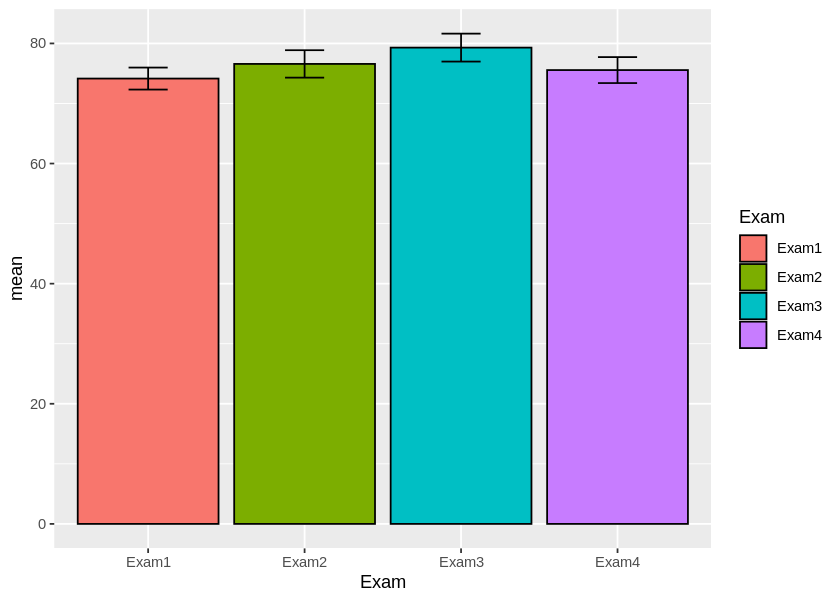

In [6]:
studentscores = read.csv("studentScores.csv")
options(repr.plot.width = 7, repr.plot.height = 5)

# reshaping the data
tidystudent = pivot_longer(studentscores, cols = 1:length(studentscores))

# renaming the columns
colnames(tidystudent) = c("Exam", "Score")


studentdata = ddply(tidystudent, c("Exam"), summarise,
                  n = length(Score),
                  mean = mean(Score),
                  s = sd(Score),
                  se = s/sqrt(n),
                  df = n - 1,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                  MOE = t_crit * se,
                  CI_bottom = mean - MOE,
                  CI_upper = mean + MOE

)
#plotdata
ggplot(studentdata, aes(x = Exam, y = mean)) +
  geom_bar(stat = "identity", colour = "black",aes(fill = Exam )) + 
  geom_errorbar(aes(ymin = CI_bottom,
                  ymax = CI_upper),
                  width = .25) 

Question 2:

In [7]:
score = tidystudent$Score
# grand mean
grandmean = mean(score)
round(grandmean, 3)

# total sum of squares (sst)
sst = sum((score - grandmean)^2)
round(sst, 3)

# model sum of squares (ssm)
ssm = sum(studentdata$n * (studentdata$mean - grandmean)^2)
round(ssm, 3)

# residual sum of squares (ssr)
ssr = sst - ssm
round(ssr , 3)

# multiple rsquared
msq = ssm / sst
round(msq, 3)

# degree of freedom (total)
dftotal = 212 - 1

# degree of freedom (model)
dfmodel = 4 - 1

# degrees of freedom (residuals)
dfres = dftotal - dfmodel

# model sum of squares (msm)
msm = ssm / dfmodel

# residual mean squares
msr = ssr / dfres

# fstat
fstat = msm / msr
round(fstat, 3)

# pvalue
pval = pf(fstat, df1 = 3, df2 = 208, lower.tail = FALSE)
round(pval, 3)

# Omega effect size
omegasquared = (ssm - dfmodel * msr)/(ssm + ssr + msr)
round(omegasquared,3)

[1] 76.4

[1] 13522.59

[1] 753.581

[1] 12769.01

[1] 0.056

[1] 4.092

[1] 0.008

[1] 0.042

Question 3:

i believe that the exams are fair because of the low effect size of 0.042 that was calculated, as well as the pvalue being less than 0.05

Question 4:

In [8]:
# subset groups
t1v2 = subset(tidystudent, Exam == "Exam1" | Exam == "Exam2")
t2v3 = subset(tidystudent, Exam == "Exam2" | Exam == "Exam3")
t3v4 = subset(tidystudent, Exam == "Exam3" | Exam == "Exam4")
t1v4 = subset(tidystudent, Exam == "Exam1" | Exam == "Exam4")
t2v4 = subset(tidystudent, Exam == "Exam2" | Exam == "Exam4")
t1v3 = subset(tidystudent, Exam == "Exam1" | Exam == "Exam3")

# Run the tests
test1 = t.test(Score ~ Exam, data = t1v2)
test2 = t.test(Score ~ Exam, data = t2v3)
test3 = t.test(Score ~ Exam, data = t3v4)
test4 = t.test(Score ~ Exam, data = t1v4)
test5 = t.test(Score ~ Exam, data = t2v4)
test6 = t.test(Score ~ Exam, data = t1v3)

# Get the p-values and store in dataframe for convenience
Test = c("1", "2", "3", "4", "5", "6")
q4p = c(test1$p.value, test2$p.value, test3$p.value, test4$p.value, test5$p.value,
test6$p.value)
df = data.frame(Test, q4p)
df

#Holm-Bonferroni Application

#Sort dataframe from small to large
df_HB = df[order(df$q4p), ]

#Assign Descending Index
df_HB$Index <- 6:1

#Get respective alpha levels
alpha = 0.05
df_HB$alphaPrime = alpha/df_HB$Index

# Significant Values
# (go from top down and stop when a comparison is no longer significant.)
df_HB$Signigicant = df_HB$q4p < df_HB$alphaPrime
df_HB

Test,q4p
<chr>,<dbl>
1,0.0979471536
2,0.0976038032
3,0.0200295967
4,0.3199406384
5,0.5147551436
6,0.0007182775


,Test,q4p,Index,alphaPrime,Signigicant
,<chr>,<dbl>,<int>,<dbl>,<lgl>
6,6,0.0007182775,6,0.008333333,TRUE
3,3,0.0200295967,5,0.010000000,FALSE
2,2,0.0976038032,4,0.012500000,FALSE
1,1,0.0979471536,3,0.016666667,FALSE
4,4,0.3199406384,2,0.025000000,FALSE
5,5,0.5147551436,1,0.050000000,FALSE


Question 5:

1. Educational level = ordinal measurement scale
2. political party = nominal measurement scale
3. Response rate = ratio measurement scale
4. Volume = ratio measurement scale
5. Calendar year = interval measurement scale
6. Customer satisfaction = oridinal measurement scale
7. Marital status = nominal measurement scale
8. Time = interval measurement scale
9. Stimulus colour = nominal measurement scale
10. Likert Scale = ordinal measurement scale

Question 6:

a. The percentile that 1372 cubic centimeters falls in 

In [9]:
round((pnorm(1372, mean = 1536.77, sd = 88.09) * 100), 3)

[1] 3.071

b. what percentile is 0.61 standard deviations from the mean?

In [10]:
round((pnorm(-0.61, mean = 0, sd = 1) * 100), 3)

[1] 27.093

c. interval of 78% of the skulls

In [11]:
lowerbound = 1536.77 - (1.2265 * (88.09/sqrt(35)))
upperbound = 1536.77 + (1.2265 * (88.09/sqrt(35)))
round(lowerbound, 3)
round(upperbound, 3)

[1] 1518.508

[1] 1555.032

Question 7:

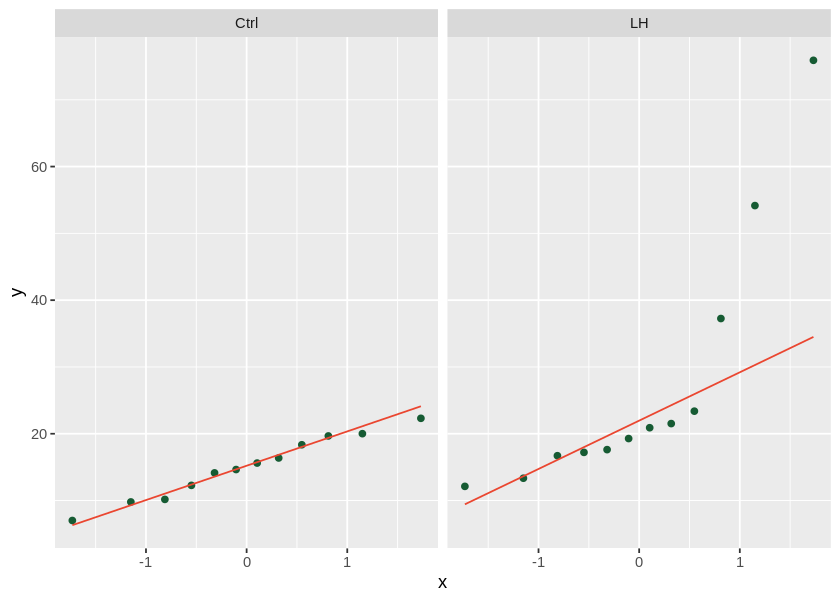

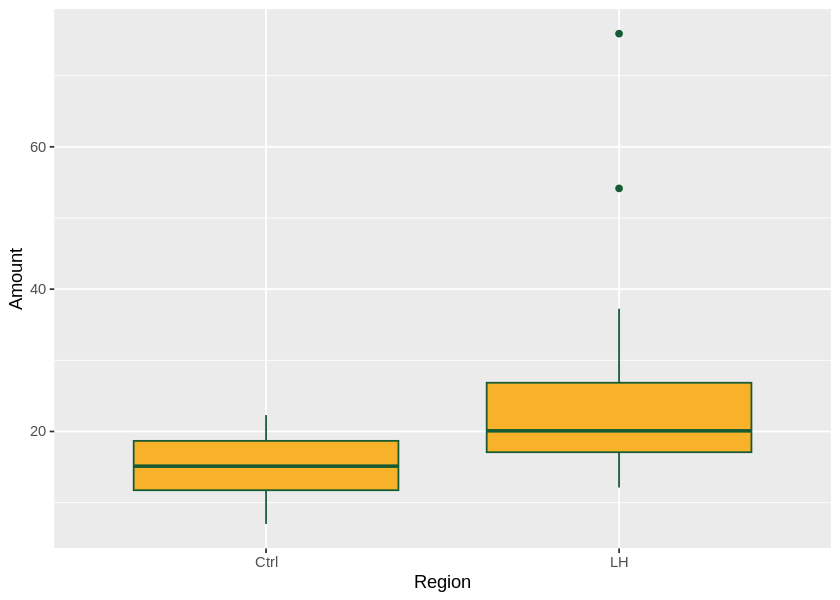

In [12]:
ratfood = read.csv("ratFood.csv")

# QQ plot
ggplot(ratfood, aes(sample = Amount)) +
  stat_qq(colour = "#165B33") +
  stat_qq_line(colour = "#EA4630") +
  facet_wrap(~ Region)

# Box Plot
ggplot(ratfood, aes(x = Region, y = Amount)) +
  geom_boxplot(fill = "#F8B229", colour = "#165B33")

I would say the assumptions are a bit satisfied.

Question 8:

In [13]:
# Get the Difference scores
Mean1 = mean(ratfood$Amount[ratfood$Region == "Ctrl"])
Mean2 = mean(ratfood$Amount[ratfood$Region == "LH"])
Var1 = var(ratfood$Amount[ratfood$Region == "Ctrl"])
Var2 = var(ratfood$Amount[ratfood$Region == "LH"])
N1 = length(ratfood$Amount[ratfood$Region == "Ctrl"])
N2 = length(ratfood$Amount[ratfood$Region == "LH"])
Q1 = Var1/N1
Q2 = Var2/N2

# degrees of freedom
q8df = ((Q1 + Q2)^2) / (((Q1^2)/(N1 - 1)) + ((Q2^2)/(N2 - 1)))
round(q8df, 3)

# standard error of the difference
diffSE = sqrt((Var1/N1) + (Var2/N2))

# test statistic
test_stat = ((Mean1 - Mean2)- 0)/diffSE
round(test_stat, 3)

# pvalue
pvalue = pt(test_stat, df = q8df, lower.tail = FALSE) * 2
round(pvalue, 3)

# critical t
alpha = 0.05
criticalT = qt(alpha/2, df = q8df, lower.tail = FALSE)

# Confidence interval
lower = (Mean1-Mean2) - criticalT*diffSE
upper = (Mean1-Mean2) + criticalT*diffSE
round(lower, 3)
round(upper, 3)


[1] 12.274

[1] -2.175

[1] 1.95

[1] -24.836

[1] -0.007

Question 9:

In [14]:
pearson = read.csv("pearsonLee.csv")
b1 = cor(pearson$parent, pearson$child) * (sd(pearson$child) / sd(pearson$parent))

b0 = mean(pearson$child) - b1 * mean(pearson$parent)

round(b1, 3)
round(b0, 3)

# Y = 42.489 + 0.364X

[1] 0.364

[1] 42.489

In [15]:
pearson$parent_z =(pearson$parent - mean(pearson$parent)) / sd(pearson$parent)
pearson$child_z = (pearson$child - mean(pearson$child)) / sd(pearson$child)

pearson$product = pearson$parent_z * pearson$child_z

q9N = nrow(pearson)
R = sum(pearson$product) / (q9N - 1)
round((R * R), 3)

[1] 0.098

Question 10:

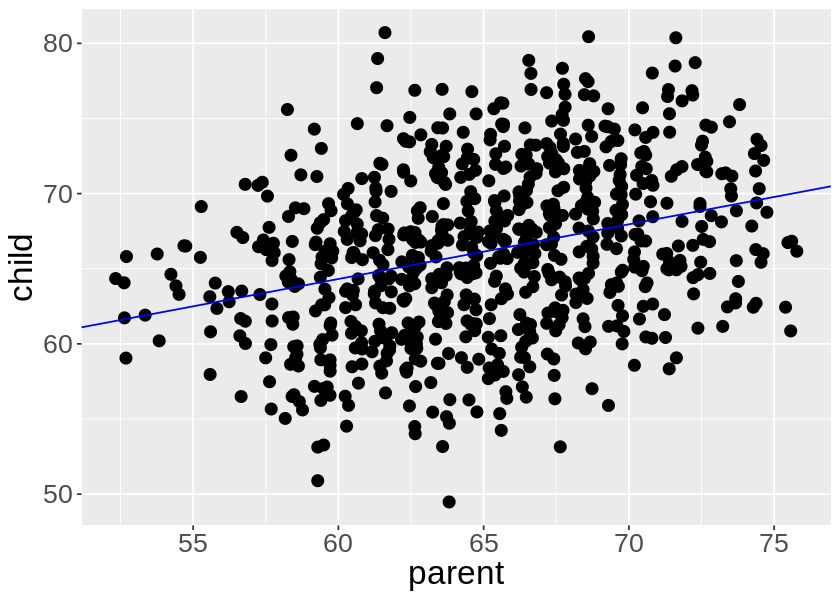

In [16]:
ggplot(pearson, aes(x = parent, y = child)) + 
  geom_point(size = 3)+
  geom_abline(intercept = b0, slope = b1, colour = "blue") + 
  theme(text = element_text(size = 20))

Question 11:

In [17]:
pearson$predicted = 42.489 + (0.364*(pearson$parent))
pearson$resid = pearson$child - pearson$predicted

# squared standard error of the residual
SEresid = sum(pearson$resid^2)/(q9N - 2)

# sum of squared deviation of X
ssx = sum((pearson$parent - mean(pearson$parent))^2)

# standard error of the slope
se_b1 = sqrt(SEresid/ssx)

# degrees of freedom
q11df = q9N - 2
q11df

# Test
B1 = 0
q11teststat = (b1 - B1)/se_b1
round(q11teststat, 3)
q11p = pt(q11teststat, df = q11df, lower.tail = FALSE)
round(q11p, 3)

# confidence interval
alpha = 0.05
q11t_crit = qt(alpha/2, df = q11df, lower.tail = FALSE)
lower11 = b1 - q11t_crit * se_b1
upper11 = b1 + q11t_crit * se_b1
round(lower11, 3)
round(upper11, 3)

[1] 744

[1] 8.976

[1] 0

[1] 0.284

[1] 0.443

Question 12:

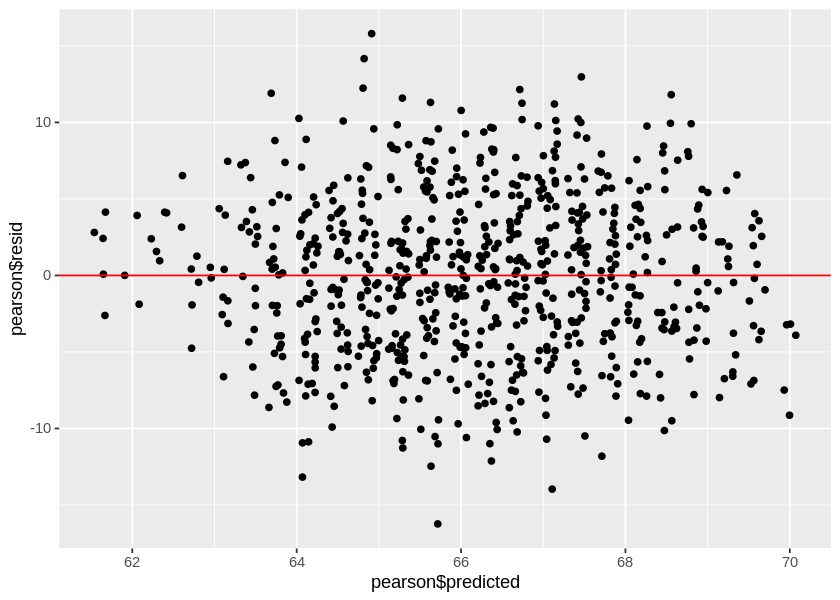

In [18]:
ggplot(mapping = aes(x = pearson$predicted, y = pearson$resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = 1, colour = "red")

Question 13:

In [42]:
#Factor sex of parent
pearson$par = factor(pearson$par)

#Factor sex of child
pearson$chl = factor(pearson$chl)


# set the contrasts
Father_v_Mother = c(1, -1)
contrasts(pearson$par) = Father_v_Mother
Daughter_v_Son = c(2, -2)
contrasts(pearson$par) = Daughter_v_Son

# new model
newmodel = lm(child ~ parent + par + chl, data = pearson)

summary(newmodel)

round((summary(newmodel)$r.squared), 3)


Call:
lm(formula = child ~ parent + par + chl, data = pearson)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3118  -3.1376   0.1473   3.3679  12.1996 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.18893    2.50614  12.445  < 2e-16 ***
parent       0.50141    0.03844  13.043  < 2e-16 ***
par1        -0.69659    0.09124  -7.635 6.97e-14 ***
chlSon       5.04392    0.32458  15.540  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.426 on 742 degrees of freedom
Multiple R-squared:  0.3607,	Adjusted R-squared:  0.3581 
F-statistic: 139.6 on 3 and 742 DF,  p-value: < 2.2e-16


[1] 0.361

Question 14:

In [39]:
#Store Summary Stats
modA = lm(child ~ parent, data = pearson)
modASum = summary(modA)
modBSum = summary(newmodel)

#F-statistic
q14N = nrow(pearson)
p_mod2 = 3
q14p_diff = 3 - 1
q14df1 = q14p_diff
q14df2 = q14N - p_mod2 - 1
q14R_sq_diff = modBSum$r.squared - modASum$r.squared

F_stat = ((q14N - p_mod2 - 1) / q14p_diff) * (q14R_sq_diff / (1 - modBSum$r.squared))
round(F_stat, 3)

q14df1
q14df2

#p-value
q14p = pf(F_stat, df1 = q14df1, df2 = q14df2, lower.tail = FALSE)
round(q14p, 3)

# the new model is preferred cuz p is less than alpha

[1] 152.643

[1] 2

[1] 742

[1] 0

Question 15:

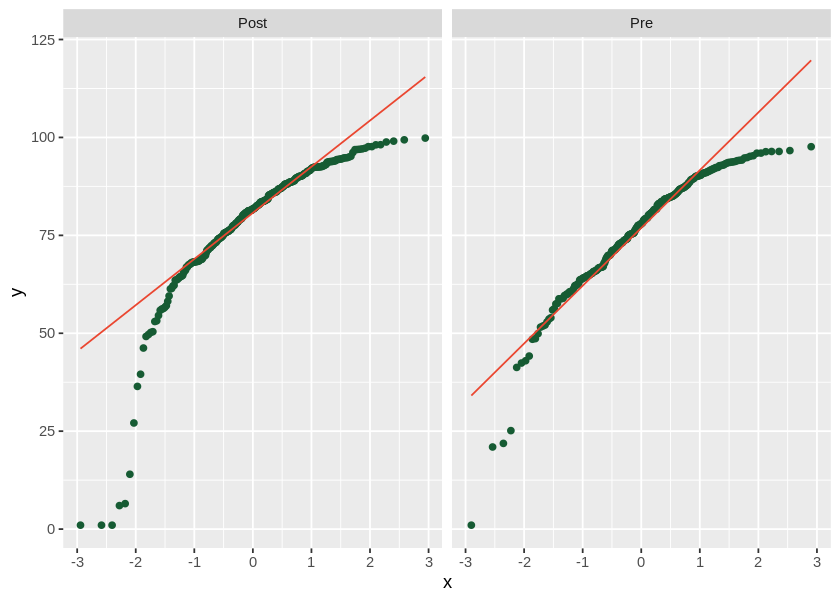

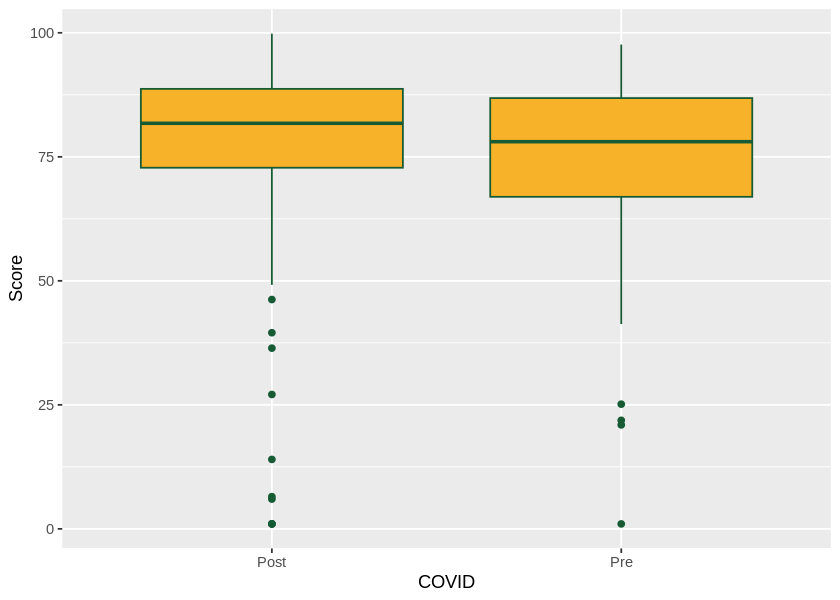

In [20]:
covid = read.csv("COVID.csv")
# QQ plot
ggplot(covid, aes(sample = Score)) +
  stat_qq(colour = "#165B33") +
  stat_qq_line(colour = "#EA4630") +
  facet_wrap(~ COVID)

# Box Plot
ggplot(covid, aes(x = COVID, y = Score)) +
  geom_boxplot(fill = "#F8B229", colour = "#165B33")

the assumptions are not satisfied.

Question 16:

In [21]:
n_1 = length(covid$Score[covid$COVID == "Post"])
n_2 = length(covid$Score[covid$COVID == "Pre"])
M_1 = mean(covid$Score[covid$COVID == "Post"])
M_2 = mean(covid$Score[covid$COVID == "Pre"])
var_1 = var(covid$Score[covid$COVID == "Post"])
var_2 = var(covid$Score[covid$COVID == "Pre"])
q_1 = var_1/n_1
q_2 = var_2/n_2

# degrees of freedom
q16df = ((q_1 + q_2)^2) / (((q_1^2)/(n_1 - 1)) + ((q_2^2)/(n_2 - 1)))
round(q16df, 3)

# standard error of the difference
diffSE16 = sqrt((var_1/n_1) + (var_2/n_2))

# test statistic
test_stat16 = ((M_1 - M_2)- 0)/diffSE16
round(test_stat16, 3)

# pvalue
pvalue16 = pt(test_stat16, df = q16df, lower.tail = FALSE)
round(pvalue16, 3)


[1] 574.212

[1] 2.021

[1] 0.022

Question 17:

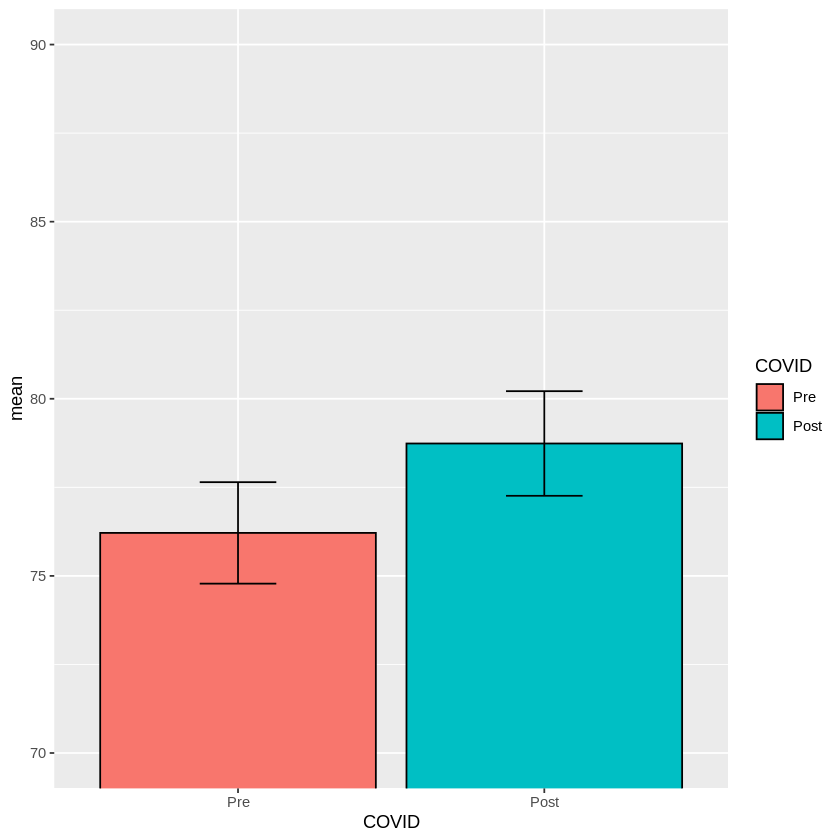

In [22]:
coviddata = ddply(covid, c("COVID"), summarise,
                  n = length(Score),
                  mean = mean(Score),
                  s = sd(Score),
                  se = s/sqrt(n),
                  df = q16df,
                  alpha = 0.05,
                  t_crit = qt(alpha, df = df, lower.tail = FALSE),
                  MOE = t_crit * se,
                  CI_bottom = mean - MOE,
                  CI_upper = mean + MOE

)
options(repr.plot.width = 7, repr.plot.height = 7)
coviddata$COVID = factor(coviddata$COVID, levels = c('Pre', "Post"))
ggplot(coviddata, aes(x = COVID, y = mean)) +
  geom_bar(stat = "identity", colour = "black",aes(fill = COVID )) + 
  geom_errorbar(aes(ymin = CI_bottom,
                  ymax = CI_upper),
                  width = .25) +
  coord_cartesian(ylim = c(70, 90))

Question 18:

Strain,n,mean,s,se,df,alpha,t_crit,MOE,CI_bottom,CI_upper
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Long Evans,9,0.3452222,0.1314779,0.04382597,8,0.05,2.306004,0.1010629,0.2441593,0.4462851
Sprague Dawley,9,0.3393333,0.1264585,0.04215283,8,0.05,2.306004,0.0972046,0.2421287,0.4365379


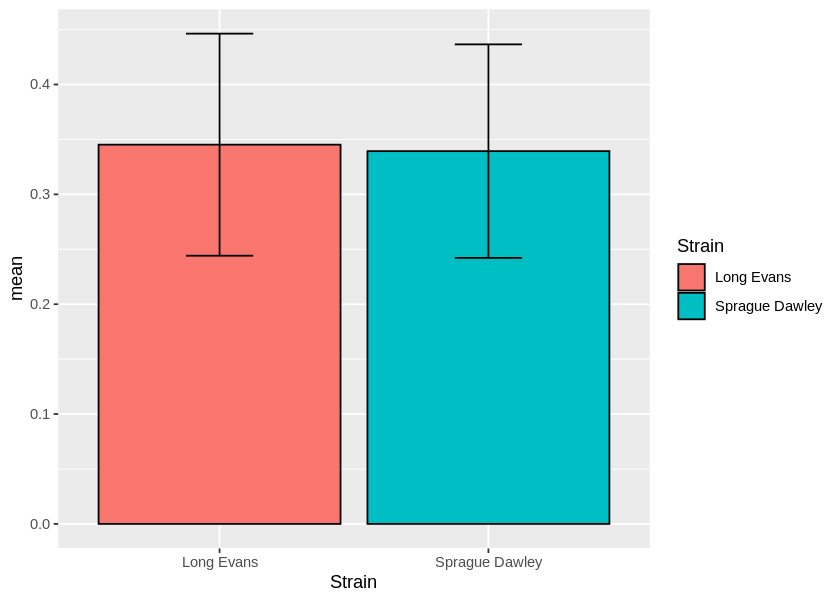

In [23]:
fear = read.csv("fearConditioning.csv")
feardata = ddply(fear, c("Strain"), summarise,
                  n = length(SupRatio),
                  mean = mean(SupRatio),
                  s = sd(SupRatio),
                  se = s/sqrt(n),
                  df = n - 1,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                  MOE = t_crit * se,
                  CI_bottom = mean - MOE,
                  CI_upper = mean + MOE

)
feardata

options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(feardata, aes(x = Strain, y = mean)) +
  geom_bar(stat = "identity", colour = "black",aes(fill = Strain )) + 
  geom_errorbar(aes(ymin = CI_bottom,
                  ymax = CI_upper),
                  width = .25)


Question 20:

In [24]:
feardata2 = ddply(fear, c("Strain", "Contingency"), summarise,
                  n = length(SupRatio),
                  mean = mean(SupRatio),
                  s = sd(SupRatio),
                  se = s/sqrt(n),
                  df = n - 1,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                  MOE = t_crit * se,
                  CI_bottom = mean - MOE,
                  CI_upper = mean + MOE

)
feardata2

Strain,Contingency,n,mean,s,se,df,alpha,t_crit,MOE,CI_bottom,CI_upper
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Long Evans,0.50,3,0.5040000,0.03874274,0.022368132,2,0.05,4.302653,0.09624230,0.40775770,0.6002423
Long Evans,0.67,3,0.3236667,0.01115049,0.006437736,2,0.05,4.302653,0.02769934,0.29596732,0.3513660
Long Evans,0.80,3,0.2080000,0.02762245,0.015947832,2,0.05,4.302653,0.06861798,0.13938202,0.2766180
Sprague Dawley,0.50,3,0.4880000,0.05666569,0.032715949,2,0.05,4.302653,0.14076537,0.34723463,0.6287654
Sprague Dawley,0.67,3,0.3176667,0.02468468,0.014251706,2,0.05,4.302653,0.06132014,0.25634653,0.3789868
Sprague Dawley,0.80,3,0.2123333,0.04578573,0.026434405,2,0.05,4.302653,0.11373807,0.09859527,0.3260714


In [25]:
sratio = fear$SupRatio
gm = mean(sratio)

# sst
sst2 = sum((sratio - gm)^2)
round(sst2, 3)

q20df = nrow(fear) - 1

# model sum of squares
ssm2 = sum(feardata2$n * (feardata2$mean - gm)^2)
round(ssm2, 3)

# # degree of freedom (model)
# dfmodel2 = 2 - 1
# dfmodel2

#number of levels in each group
j = 2 * 3

# model degree of freedom
dfm = j - 1

# Main Effect of Delay
q20plotdata = ddply(fear, c("Contingency"), summarise,
                    n = length(SupRatio),
                    mean = mean(SupRatio)
                    )
q20plotdata
ssb20 = sum(q20plotdata$n * (q20plotdata$mean - gm)^2)
round(ssb20, 3)
q20df_2 = 2

# Main Effect of Strain
q20plotdata2 = ddply(fear, c("Strain"), summarise,
                    n = length(SupRatio),
                    mean = mean(SupRatio)
                    )
q20plotdata2
ssb202 = sum(q20plotdata2$n * (q20plotdata2$mean - gm)^2)
round(ssb202, 3)
q20df_3 = 1


ssinterac = ssm2 - ssb20 - ssb202
ssinterac

dfinterac = 2 * 1
dfinterac

ssR = sst2 - ssm2 
round(ssR, 3)

q20df_R = 12

# mean square of contingency
mscont = ssb20/q20df_2
round(mscont, 3)

# mean square of strain
msstrain = ssb202/q20df_3
round(msstrain, 3)

# mean square of interac
msinterac = ssinterac / dfinterac
round(msinterac, 3)

# mean square of residuals
msresid = ssR / 12
round(msresid, 3)

# Fcont
Fcont = ssb20/msresid
round(Fcont, 3)

# Fstrain
Fstr = ssb202/msresid
round(Fstr, 3)

# Finterac
Fint = msinterac / msresid
round(Fint, 3)

p_Strain = pf(Fstr, df1 = q20df_3, df2 = q20df_R, lower.tail = FALSE)
round(p_Strain, 3)
p_Cont = pf(Fcont, df1 = q20df_2, df2 = q20df_R, lower.tail = FALSE)
round(p_Cont, 3)
p_Int = pf(Fint, df1 = dfinterac, df2 = q20df_R, lower.tail = FALSE)
round(p_Int, 3)

#omega
omega_sq = (ssm2 - dfm * msresid)/(ssm2 + ssR + msresid)
round(omega_sq,3)

[1] 0.266

[1] 0.25

Contingency,n,mean
<dbl>,<int>,<dbl>
0.50,6,0.4960000
0.67,6,0.3206667
0.80,6,0.2101667


[1] 0.249

Strain,n,mean
<chr>,<int>,<dbl>
Long Evans,9,0.3452222
Sprague Dawley,9,0.3393333


[1] 0

[1] 0.0003101111

[1] 2

[1] 0.017

[1] 0.125

[1] 0

[1] 0

[1] 0.001

[1] 180.112

[1] 0.113

[1] 0.112

[1] 0.743

[1] 0

[1] 0.895

[1] 0.907

Question 21:

In [26]:
A = c(158, 3, 161)
B = c(9, 117, 126)
C = c(167, 120, 287)
q21df = data.frame(A, B, C)
rownames(q21df) = c("Naughty", "Nice", "Total")
colnames(q21df) = c("Yes", "No", "Total")
q21df

A2 = c(93.683, 67.317, 161)
B2 = c(73.317, 52.683, 126)
C2 = c(167, 120, 287)
expected = data.frame(A2, B2, C2)
rownames(expected) = c("Naughty", "Nice", "Total")
colnames(expected) = c("Yes", "No", "Total")
expected

Xsquared = (((158 - 93.683)^2)/93.683)+
(((3 - 67.317)^2)/67.317) +
(((9 - 73.317)^2)/73.317)+
(((117 - 52.683)^2)/52.683)
round(Xsquared, 3)

q21df = (2-1) * (2 - 1)
q21df

q21pval = pchisq(Xsquared, df = 1, lower.tail = FALSE)
q21pval

# There is no evidence of independence

,Yes,No,Total
,<dbl>,<dbl>,<dbl>
Naughty,158,9,167
Nice,3,117,120
Total,161,126,287


,Yes,No,Total
,<dbl>,<dbl>,<dbl>
Naughty,93.683,73.317,167
Nice,67.317,52.683,120
Total,161.000,126.000,287


[1] 240.549

[1] 1

[1] 2.985781e-54

Question 22:

In [27]:
# Missing | Naughty 
missNaughty = 158/9
round(missNaughty, 3)

# Missing | Nice 
missNice = 3/117
round(missNice, 3)

oddsRatio = missNaughty / missNice
round(oddsRatio, 3)

## The odds of being missing if you are naughty is  684.667  times higher 
## than getting missing if you are nice.

[1] 17.556

[1] 0.026

[1] 684.667